In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from scipy import random
from scipy.stats import uniform
from scipy.spatial.distance import euclidean

from exact_barycenter import *

import ot

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# Toy example for logistic regression

In [2]:
np.random.seed(3)

N = 100
support = 1000

# generate random means and variances
means = random.uniform(low=10, high=25, size=N)
variances = random.uniform(low=1, high=2, size=N)
x = np.linspace(-20, 50, support) 

C0 = np.zeros((N,support)) # space for class 0 
C1 = np.zeros((N,support)) # space for class 1

cste = 8
for i, (mean, v) in enumerate(zip(means, variances)):  
    #C0[i, :] = 1/2 * norm.pdf(x, loc=mean+8, scale=v/2) + 1/2 * norm.pdf(x, loc=mean-8, scale=v*2)
    #C1[i, :] = 1/2 * norm.pdf(x, loc=mean-8, scale=v/2) + 1/2 * norm.pdf(x, loc=mean+8, scale=v*2)    
    C1[i,:] = 1/np.sqrt(2*np.pi*(v/2)**2) * np.exp(-0.5*((x-(mean-cste))**2)/(v/2)**2) + 1/np.sqrt(2*np.pi*(v*2)**2) * np.exp(-0.5*((x-(mean+cste))**2)/(v*2)**2)
    C0[i,:] = 1/np.sqrt(2*np.pi*(v/2)**2) * np.exp(-0.5*((x-(mean+cste))**2)/(v/2)**2) + 1/np.sqrt(2*np.pi*(v*2)**2) * np.exp(-0.5*((x-(mean-cste))**2)/(v*2)**2)
print(np.sum(C0[1, :]))

# get normalized measure
for i in range(C0.shape[0]):
    C0[i,:] = C0[i,:] / np.sum(C0[i, :])
for i in range(C1.shape[0]):
    C1[i,:] = C1[i,:] / np.sum(C1[i, :])   

bar0, C0_inv, bar0_inv = get_barycenter(C0, x, 10000)
bar1, C1_inv, bar1_inv = get_barycenter(C1, x, 10000)

# create the dataset 
y = np.concatenate([np.zeros(N,), np.ones(N,)])
X = np.concatenate([C0, C1])
n,d = X.shape

# L2 bar
L2_bar0 = np.mean(X[y==0, :], axis=0)
L2_bar1 = np.mean(X[y==1, :], axis=0)


28.542857142857144
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a psd!
weird for a 

In [3]:
def my_norm(u):
    return u / np.sum(u)

wass_dist = np.zeros((X.shape[0],2))

wass_dist[:N,0] = get_distance(C0_inv, bar0_inv)
wass_dist[N:,0] = get_distance(C0_inv, bar1_inv)
wass_dist[:N,1] = get_distance(C1_inv, bar0_inv)
wass_dist[N:,1] = get_distance(C0_inv, bar0_inv)
wass_dist = np.sqrt(wass_dist)
    
XX = np.zeros((n,2))
for j, m in enumerate(X):
    XX[j, 0] = euclidean(m, L2_bar0)
    XX[j, 1] = euclidean(m, L2_bar1)



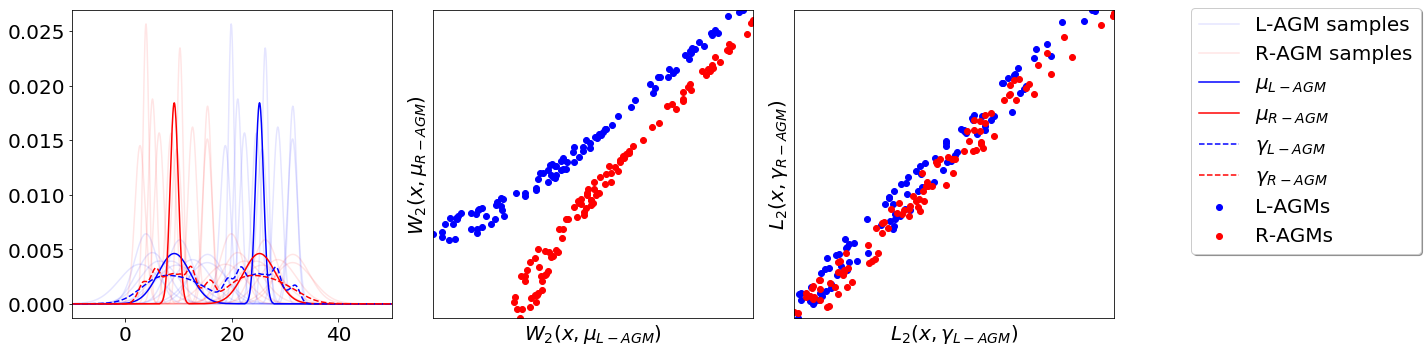

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(20,5)) 


ax[0].plot(x, C0[1:10, :].T, alpha = 0.1, color='b')
ax[0].plot(x, C1[1:10,:].T, alpha = 0.1, color='r')
l1, = ax[0].plot(x, C0[0, :].T, alpha = 0.1, color='b', label='L-AGM samples')
l2, = ax[0].plot(x, C1[0,:].T, alpha = 0.1, color='r', label='R-AGM samples')

ax[0].set_xlim([-10, 50])
l3, = ax[0].plot(x, bar0, label='$\mu_{L-AGM}$', color='b')
l4, = ax[0].plot(x, bar1, label='$\mu_{R-AGM}$', color='r')
l5, = ax[0].plot(x, L2_bar0, label='$\gamma_{L-AGM}$', color='b', linestyle='--')
l6, = ax[0].plot(x, L2_bar1, label='$\gamma_{R-AGM}$', color='r', linestyle='--')

ax[1].set_xlim([np.min(wass_dist[:,0]), np.max(wass_dist[:,0])])
ax[1].set_ylim([np.min(wass_dist[:,1]), np.max(wass_dist[:,1])])
l7 = ax[1].scatter(wass_dist[y==0, 0], wass_dist[y==0, 1], color='b', label="L-AGMs")
l8 = ax[1].scatter(wass_dist[y==1, 0], wass_dist[y==1, 1], color='r', label="R-AGMs")
ax[1].set_xlabel("$W_2(x,\mu_{L-AGM})$", fontsize=20)
ax[1].set_ylabel("$W_2(x,\mu_{R-AGM})$", fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].set_xlim([np.min(XX[:,0]), np.max(XX[:,0])])
ax[2].set_ylim([np.min(XX[:,1]), np.max(XX[:,1])])
ax[2].scatter(XX[y==0, 0], XX[y==0, 1], color='b', label="0")
ax[2].scatter(XX[y==1, 0], XX[y==1, 1], color='r', label="1")
ax[2].set_xlabel("$L_2(x,\gamma_{L-AGM})$", fontsize=20)
ax[2].set_ylabel("$L_2(x,\gamma_{R-AGM})$", fontsize=20)
ax[2].set_xticks([])
ax[2].set_yticks([])


plt.legend(handles=[l1, l2, l3, l4, l5, l6, l7, l8], loc='upper center', bbox_to_anchor=(1.6, 1.04), ncol=1, fancybox=True, shadow=True, fontsize=20)


plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.savefig('figures/toy_example.pdf')
plt.show()



# Geodesics figure

In [3]:
def PSD2Signal(frequencies, times, psd):
    signal = np.zeros(len(times))
    for f, p in zip(frequencies, psd): 
        signal += np.sqrt(p)*np.cos(f*times)
    return signal

def rect(x):
    res = np.zeros(x.shape)
    res[np.abs(x) <= 0.5] = 1
    return res

def geodesic(psd1, psd2, support, n_step):
    # compute cost
    u, v = np.meshgrid(support ,support)
    cost = (u-v)**2
    cost = np.ascontiguousarray(cost, dtype='float64')
    
    plan = ot.emd(np.ascontiguousarray(psd1), np.ascontiguousarray(psd2), cost)
    taus = np.linspace(0, 1, n_step)
    print(taus)
    #plt.figure()
    #plt.imshow(plan)
    supports = []
    values = []
    for tau in taus:
        bar_support = dict()
        for idx_i, i in enumerate(support):
            for idx_j, j in enumerate(support):
                if plan[idx_i, idx_j] > 0: 
                    if (tau*i + (1-tau)*j) in bar_support:
                        bar_support[tau*i + (1-tau)*j] +=  plan[idx_i, idx_j]
                    else:
                        bar_support[tau*i + (1-tau)*j] =  plan[idx_i, idx_j]
    

        s = list(bar_support.keys())
        v = list(bar_support.values())
        supports.append(s)
        values.append(v)
        
    return supports, values

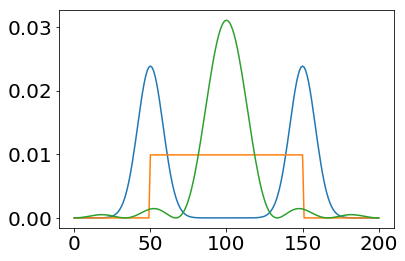

In [4]:
# interpolation
frequencies = np.linspace(-1,1, 201)

freq = 30
sin_psd = np.zeros(len(frequencies))
sin_psd[freq] = 0.5 
sin_psd[-freq-1] = 0.5

freq1 = 10
freq2 = 70
sin2_psd = np.zeros(len(frequencies))
sin2_psd[freq1] = 0.25 
sin2_psd[-freq1-1] = 0.25
sin2_psd[freq2] = 0.25 
sin2_psd[-freq2-1] = 0.25

chi = 1
sinc_psd = ((1/np.abs(chi)) * rect(frequencies/chi))**2
sinc_psd /= np.sum(sinc_psd)

rect_psd = np.abs(np.sinc(3*frequencies))**2
rect_psd /= np.sum(rect_psd)

var = .007
mean = 0.5
gaus_psd = np.exp(-(frequencies-mean)**2 / (2*var) ) + np.exp(-(frequencies+mean)**2 / (2*var) )
gaus_psd /= np.sum(gaus_psd)

plt.plot(gaus_psd)
plt.plot(sinc_psd)
plt.plot(rect_psd)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.2 0.4 0.6 0.8 1. ]


Text(-40, 0, '1')

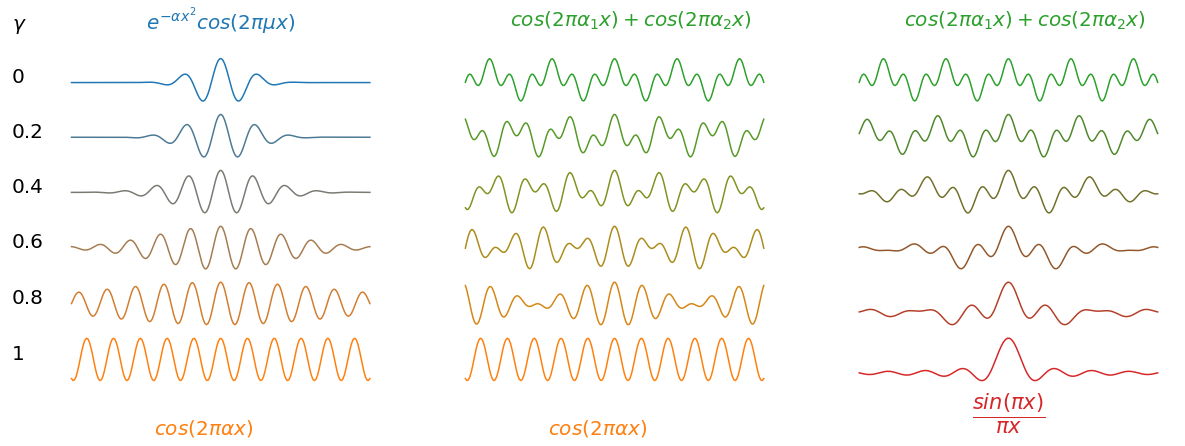

In [84]:
import matplotlib.colors as mcolors


ccc = [mcolors.to_rgb(c) for c in mcolors.TABLEAU_COLORS]
taus = np.linspace(0,1,6)
print(2*ccc[0])

column1 = []
for t in taus:
    res = [t * c2 + (1-t) * c1 for c1, c2 in zip(ccc[0], ccc[1]) ]
    res = tuple(res)
    column1.append(res)
    
column2 = []
for t in taus:
    res = [t * c2 + (1-t) * c1 for c1, c2 in zip(ccc[2], ccc[1]) ]
    res = tuple(res)
    column2.append(res)
    
column3 = []
for t in taus:
    res = [t * c2 + (1-t) * c1 for c1, c2 in zip(ccc[2], ccc[3]) ]
    res = tuple(res)
    column3.append(res)
    
colors = column1 + column2 + column3
fig, ax = plt.subplots(6, 3, figsize=(20,6))
#colors = plt.cm.brg(np.linspace(0,1,16))
#print(idxs)
#idxs = [i for i in range(len(colors))]
#idxs = idxs[:6] + list(reversed(idxs[5:11])) + idxs[10:]
#colors = colors[idxs,:]
#print(colors)


psds = [(gaus_psd, sin_psd), (sin2_psd, sin_psd), (sin2_psd, sinc_psd)]
idx = 0
color_idx = 0 
for p1, p2 in psds:
    supports, values = geodesic(p2, p1, frequencies, 6)
    times = np.linspace(-50, 50, 200)
    for j, (s, v) in enumerate(zip(supports, values)):
        signal = PSD2Signal(s, times, v)
        ax[j, idx].plot(signal, color=colors[color_idx]) 
        ax[j, idx].axis('off')
        color_idx += 1
    idx += 1

    
ax[0,0].text(50,20,r'$e^{-\alpha x^2}cos(2\pi \mu x)$', fontsize=20, color=colors[0])

ax[5, 0].text(55, -5, r'$cos(2\pi\alpha x)$', fontsize=20, color=colors[5])
ax[5, 1].text(55, -5, r'$cos(2\pi\alpha x)$', fontsize=20, color=colors[5])

ax[0, 1].text(30, 5, r'$cos(2\pi\alpha_1 x) + cos(2\pi\alpha_2x)$', fontsize=20, color=colors[12])
ax[0, 2].text(30, 5, r'$cos(2\pi\alpha_1 x) + cos(2\pi\alpha_2x)$', fontsize=20, color=colors[12])

ax[5, 2].text(75, -15, r'$\frac{sin(\pi x)}{\pi x}$', fontsize=30, color=colors[17])
ax[0,0].text(-40, 20, r'$\gamma$', fontsize=20)
ax[0,0].text(-40,0, '0', color='black', fontsize=20)
ax[1,0].text(-40,0, '0.2', color='black', fontsize=20)
ax[2,0].text(-40,0, '0.4', color='black', fontsize=20)
ax[3,0].text(-40,0, '0.6', color='black', fontsize=20)
ax[4,0].text(-40,0, '0.8', color='black', fontsize=20)
ax[5,0].text(-40,0, '1', color='black', fontsize=20)


In [86]:
fig.savefig('figures/sinc_gaus_sin.pdf', bbox='tight')

# Geodesic path between Gaussian PSDs 

0.0246740110027234
0.05062931505264387
0.08581357698005514
0.1302267967849573
0.18386897446735026
0.24674011002723395


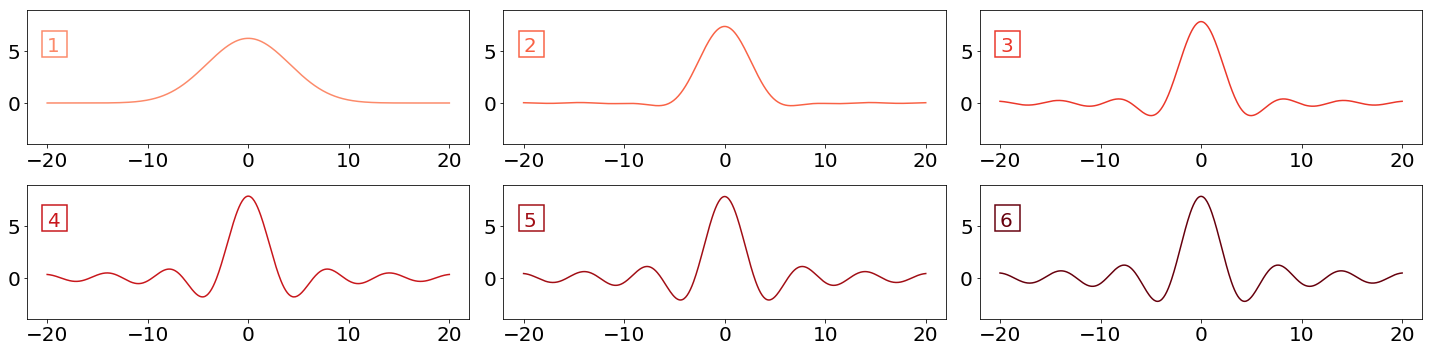

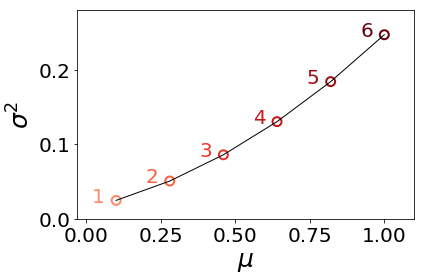

In [9]:
import matplotlib.patches as patches

# store points
mus = []
alphas = []

# initial parameters
N = 6                  # number of iterpolations
alpha1 = 0.01             # variance of first PSD
mu1 = 0.1               # mean of first PSD
alpha2 = 0.1             # variance of second PSD
mu2 = 1               # mean of second PSD


# plot settings
colors=plt.cm.Reds(np.linspace(0.4,1,N))
fig, ax = plt.subplots(2,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.01, hspace=0.3)
l = 0; c = 0


# experiment
frequencies = np.linspace(-1,1,101)
taos = np.linspace(0,1,N)

for i, tao in enumerate(taos):
    
    # compute new parameters
    alpha = ((1-tao) * np.sqrt(alpha1) + tao*np.sqrt(alpha2))**2
    mu = (1-tao) * mu1 + tao * mu2
    
    # compute PSD
    variance = alpha / 4*np.pi**2
    print(variance)
    
    real_psd = np.exp(-0.5*(frequencies + mu)**2 / variance ) + np.exp(-0.5*(frequencies - mu)**2 / variance ) 
    real_psd /= np.sum(real_psd)
    
    gaus_psd = np.exp(-(frequencies - mu)**2 / (2*variance)) #+ np.exp(-(frequencies+mean)**2 / (2*var))
    gaus_psd /= np.sum(gaus_psd)
    
    mus.append(mu)
    alphas.append(variance)
    
    # compute signal
    times = np.linspace(-20, 20, 500)
    signal = np.zeros(len(times))
    for ss, rr in zip(frequencies, gaus_psd): 
        signal += np.sqrt(rr) * np.cos(ss*times)
        
    ax[l, c].plot(times, signal, color=colors[i]) 
    ax[l, c].text(-20, 5, str(i+1), color=colors[i], fontsize=20)
    ax[l, c].set_ylim([-4,9])
    # Create a Rectangle patch
    rect = patches.Rectangle((-20.5,4.5),2.5,2.5, linewidth=1.5, edgecolor=colors[i], facecolor='none')
    ax[l, c].add_patch(rect)
    
    c += 1
    if c > 2:
        c = 0
        l += 1
   
    fig.tight_layout()
    fig.savefig('figures/gaussian_interpolation.pdf')

plt.figure()
plt.plot(mus, alphas, linewidth=1, color='black')
plt.xlabel(r'$\mu$', fontsize=25)
plt.ylabel(r'$\sigma^2$', fontsize=25)
for i, (mu, alpha) in enumerate(zip(mus, alphas)):
    plt.scatter(mu, alpha, marker='o', linewidth=2, s=80, facecolors='none', edgecolors=colors[i])
    plt.text(mu-.08, alpha -.002,str(i+1), color=colors[i], fontsize=20)
    plt.xlim([-0.03,1.1])
    plt.ylim([0, 0.28])
plt.tight_layout()
plt.savefig('figures/geodesic_path.pdf')
plt.show()